In [4]:
import pandas as pd
import numpy as np

In [49]:
emotions = open('./output32/emotions.txt', 'r')
emotion_dict = {emotion.replace('\n', ''): i for i, emotion in enumerate(emotions)}
emotion_inv = {i: emotion.replace('\n', '') for emotion, i in emotion_dict.items()}
emotion_inv

{0: 'sentimental',
 1: 'afraid',
 2: 'proud',
 3: 'faithful',
 4: 'terrified',
 5: 'joyful',
 6: 'angry',
 7: 'sad',
 8: 'jealous',
 9: 'grateful',
 10: 'prepared',
 11: 'embarrassed',
 12: 'excited',
 13: 'annoyed',
 14: 'lonely',
 15: 'ashamed',
 16: 'guilty',
 17: 'surprised',
 18: 'nostalgic',
 19: 'confident',
 20: 'furious',
 21: 'disappointed',
 22: 'caring',
 23: 'trusting',
 24: 'disgusted',
 25: 'anticipating',
 26: 'anxious',
 27: 'hopeful',
 28: 'content',
 29: 'impressed',
 30: 'apprehensive',
 31: 'devastated'}

In [50]:
truth = pd.read_csv('./output32/test.tsv', sep='\t', header=None).iloc[:,1]
pred = pd.read_csv('./output32/test.tsv.label_predictions.tsv', sep='\t')['emotion_1'].map(lambda x: emotion_dict[x])

truth_text = pd.read_csv('./output32/test.tsv', sep='\t', header=None).iloc[:,1].map(lambda x: emotion_inv[x])
pred_text = pd.read_csv('./output32/test.tsv.label_predictions.tsv', sep='\t')['emotion_1']
pred_text

0          terrified
1             guilty
2            furious
3       apprehensive
4          terrified
            ...     
5709         hopeful
5710       disgusted
5711       disgusted
5712         anxious
5713         anxious
Name: emotion_1, Length: 5714, dtype: object

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [59]:
cf = pd.DataFrame(confusion_matrix(truth, pred))

Text(69.0, 0.5, 'Pred')

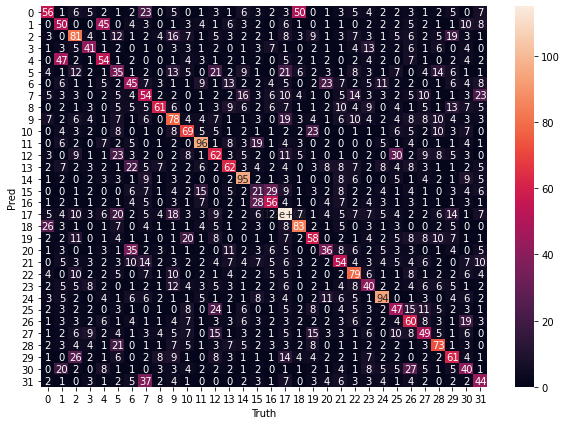

In [61]:
plt.figure(figsize = (10,7))

sn.heatmap(cf, annot=True)
plt.xlabel('Truth')
plt.ylabel('Pred')

In [53]:
emotion_inv

{0: 'sentimental',
 1: 'afraid',
 2: 'proud',
 3: 'faithful',
 4: 'terrified',
 5: 'joyful',
 6: 'angry',
 7: 'sad',
 8: 'jealous',
 9: 'grateful',
 10: 'prepared',
 11: 'embarrassed',
 12: 'excited',
 13: 'annoyed',
 14: 'lonely',
 15: 'ashamed',
 16: 'guilty',
 17: 'surprised',
 18: 'nostalgic',
 19: 'confident',
 20: 'furious',
 21: 'disappointed',
 22: 'caring',
 23: 'trusting',
 24: 'disgusted',
 25: 'anticipating',
 26: 'anxious',
 27: 'hopeful',
 28: 'content',
 29: 'impressed',
 30: 'apprehensive',
 31: 'devastated'}

In [69]:
cm = confusion_matrix(truth, pred)

def translate_pair(pair):
    return (emotion_inv[pair[0]], emotion_inv[pair[1]])

In [70]:
confusions_dict = dict()

for i, row in enumerate(cm):
    for j, col in enumerate(row):
        if i != j:
            if (j, i) not in confusions_dict:
                confusions_dict[(i, j)] = col
            else:
                confusions_dict[(j, i)] += col
                
sorted([(translate_pair(pair), num) for pair, num in confusions_dict.items()], key=lambda x: -x[1])

[(('afraid', 'terrified'), 92),
 (('sentimental', 'nostalgic'), 76),
 (('sad', 'devastated'), 60),
 (('angry', 'furious'), 58),
 (('ashamed', 'guilty'), 57),
 (('excited', 'anticipating'), 54),
 (('anxious', 'apprehensive'), 46),
 (('proud', 'impressed'), 45),
 (('joyful', 'excited'), 44),
 (('prepared', 'confident'), 43),
 (('joyful', 'surprised'), 41),
 (('grateful', 'surprised'), 37),
 (('joyful', 'content'), 35),
 (('angry', 'annoyed'), 35),
 (('embarrassed', 'ashamed'), 34),
 (('afraid', 'apprehensive'), 30),
 (('sentimental', 'sad'), 28),
 (('surprised', 'impressed'), 28),
 (('sad', 'lonely'), 25),
 (('proud', 'joyful'), 24),
 (('excited', 'hopeful'), 24),
 (('confident', 'hopeful'), 23),
 (('proud', 'grateful'), 22),
 (('faithful', 'trusting'), 21),
 (('sad', 'caring'), 21),
 (('jealous', 'impressed'), 21),
 (('anticipating', 'hopeful'), 21),
 (('proud', 'confident'), 20),
 (('joyful', 'grateful'), 20),
 (('grateful', 'caring'), 20),
 (('excited', 'surprised'), 20),
 (('sad', 'd

In [3]:
import math

def getDistance(emoA, emoB):
    return math.sqrt(sum([(a - b)**2 for a, b in zip(emoA, emoB)]))
    
def getPairs(emotions):
    distances = {}
    for keyA in emotions:
        for keyB in emotions:
            if keyA != keyB and (keyB, keyA) not in distances:
                distances[(keyA, keyB)] = getDistance(emotions[keyA], emotions[keyB])
    distances = list(filter(lambda x: x[1] <= 2.5, [(pair, value)
                                                               for pair, value in distances.items()]))
    distances = sorted(distances, key=lambda x: x[1])
    return distances

emotions = {
    'sentimental': [6.27, 2.95, 6.73],
    'afraid': [2.25, 5.12, 2.71],
    'proud': [7, 5.55, 7.09],
    'faithful': [7.95, 4.48, 7.29],
    'terrified': [2.51, 6.1, 3.29],
    'joyful': [8.21, 5.53, 7.05],
    'angry': [2.53, 6.2, 4.11],
    'sad': [2.1, 3.49, 3.84],
    'jealous': [2.38, 5.9, 4.68],
    'grateful': [7.5, 4.29, 7],
    'prepared': [5.32, 4.15, 7.26],
    'embarrassed': [3.51, 5.38, 3.67],
    'excited': [8.11, 6.43, 7.33],
    'annoyed': [2.8, 5.29, 4.08],
    'lonely': [2.67, 4.37, 3.33],
    'ashamed': [2.52, 5.65, 4.63],
    'guilty': [3.09, 4.65, 4.5],
    'surprised': [6.57, 5.95, 4.72],
    'nostalgic': [6.68, 4.37, 5.05],
    'confident': [7.56, 4.62, 7.04],
    'furious': [2.57, 6.09, 3.89],
    'disappounted': [2.65, 4.47, 4.08],
    'caring': [7.64, 2.67, 6.56],
    'trusting': [7.24, 4.3, 6.95],
    'disgusted': [2.68, 4.89, 4.24],
    'anticipating': [6, 5.7, 5.36],
    'anxious': [3.8, 6.2, 4.15],
    'hopeful': [7.44, 4.84, 6.58],
    'content': [6.7, 3.17, 5.92],
    'impressed': [6.66, 4.9, 6.38],
    'apprehensive': [3.32, 4.77, 4.64],
    'devastated': [2.09, 5.5, 3.96]
}

getPairs(emotions)

[(('angry', 'furious'), 0.24919871588754258),
 (('grateful', 'trusting'), 0.26495282598983516),
 (('jealous', 'ashamed'), 0.2908607914449798),
 (('guilty', 'apprehensive'), 0.294788059459673),
 (('grateful', 'confident'), 0.33778691508109077),
 (('annoyed', 'disgusted'), 0.4472135954999582),
 (('disappounted', 'disgusted'), 0.45044422518220834),
 (('confident', 'trusting'), 0.4614108798023729),
 (('faithful', 'confident'), 0.4839421453025148),
 (('confident', 'hopeful'), 0.5238320341483514),
 (('guilty', 'disgusted'), 0.5415717865620395),
 (('faithful', 'grateful'), 0.5680668974689516),
 (('terrified', 'furious'), 0.6030754513325841),
 (('guilty', 'disappounted'), 0.6343500610861483),
 (('angry', 'jealous'), 0.6613622305514575),
 (('trusting', 'hopeful'), 0.6844705983459043),
 (('grateful', 'hopeful'), 0.69462219947249),
 (('annoyed', 'ashamed'), 0.71449282711585),
 (('annoyed', 'devastated'), 0.7500666637039671),
 (('lonely', 'disappounted'), 0.7569015788066503),
 (('angry', 'ashamed'